In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
import hdbscan
from sklearn.metrics import silhouette_score

 #### Create sample dataset (two types to show how HDBSCAN works)

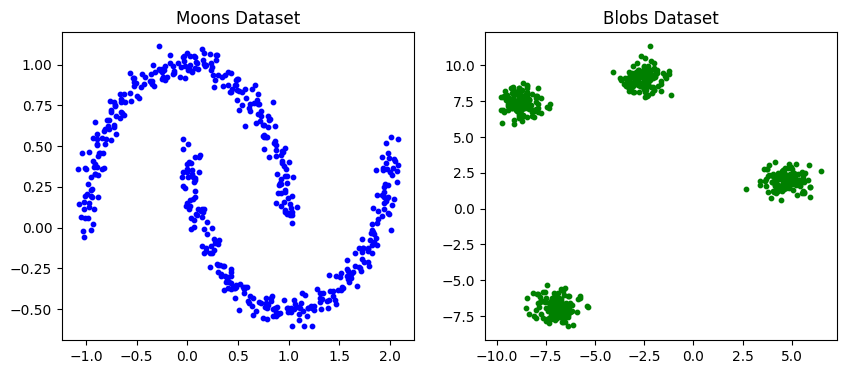

In [2]:
# moons dataset (non-linear clusters)
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# blobs dataset (easy, well-separated clusters)
X_blobs, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Plot both datasets
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(X_moons[:,0], X_moons[:,1], s=10, color='blue')
ax[0].set_title("Moons Dataset")

ax[1].scatter(X_blobs[:,0], X_blobs[:,1], s=10, color='green')
ax[1].set_title("Blobs Dataset")
plt.show()


#### Apply HDBSCAN on moons dataset

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


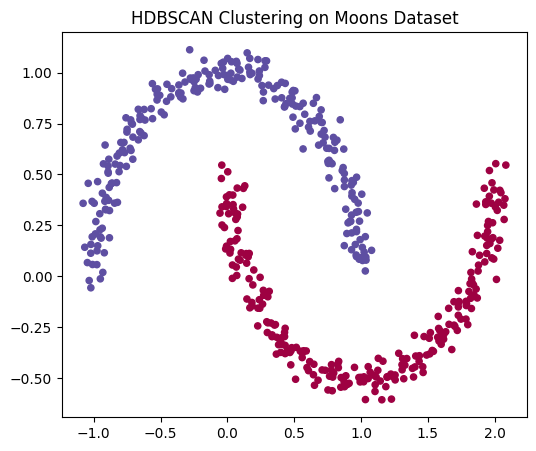

Number of clusters (excluding noise): 2
Noise points: 0


In [3]:
clusterer_moons = hdbscan.HDBSCAN(min_cluster_size=20) 
labels_moons = clusterer_moons.fit_predict(X_moons)

# Plot results
plt.figure(figsize=(6,5))
plt.scatter(X_moons[:,0], X_moons[:,1], c=labels_moons, cmap="Spectral", s=20)
plt.title("HDBSCAN Clustering on Moons Dataset")
plt.show()

print("Number of clusters (excluding noise):", len(set(labels_moons)) - (1 if -1 in labels_moons else 0))
print("Noise points:", list(labels_moons).count(-1))

#### Apply HDBSCAN on blobs dataset

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


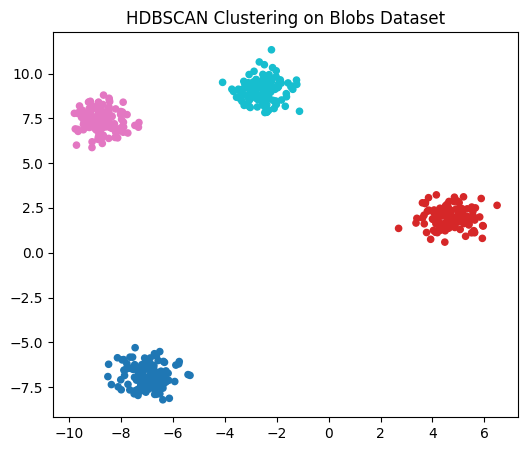

Number of clusters (excluding noise): 4
Noise points: 0


In [8]:
clusterer_blobs = hdbscan.HDBSCAN(min_cluster_size=15)
labels_blobs = clusterer_blobs.fit_predict(X_blobs)

plt.figure(figsize=(6,5))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels_blobs, cmap="tab10", s=20)
plt.title("HDBSCAN Clustering on Blobs Dataset")
plt.show()

print("Number of clusters (excluding noise):", len(set(labels_blobs)) - (1 if -1 in labels_blobs else 0))
print("Noise points:", list(labels_blobs).count(-1))

#### Evaluate with Silhouette Score (ignoring noise points)

In [5]:
def evaluate(X, labels):
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(X[mask], labels[mask])
        return score
    else:
        return "Not enough clusters for silhouette score."

print("Moons dataset silhouette score:", evaluate(X_moons, labels_moons))
print("Blobs dataset silhouette score:", evaluate(X_blobs, labels_blobs))

Moons dataset silhouette score: 0.3340617528457047
Blobs dataset silhouette score: 0.8757323158768271


#### Extra visualization - Cluster probability

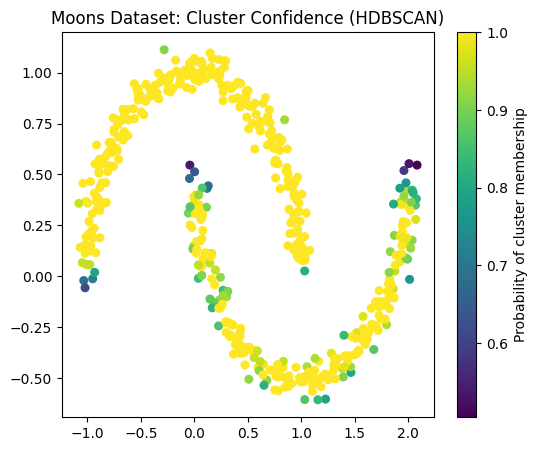

In [6]:
plt.figure(figsize=(6,5))
plt.scatter(X_moons[:,0], X_moons[:,1], c=clusterer_moons.probabilities_, cmap="viridis", s=30)
plt.title("Moons Dataset: Cluster Confidence (HDBSCAN)")
plt.colorbar(label="Probability of cluster membership")
plt.show()